In [1]:
import pandas as pd
filename = "Dataset_SmatWatcher2.csv"
df = pd.read_csv("datasets/" + filename)
df.columns

Index(['_id', 'metadata.speed', 'metadata.bateria', 'metadata.numSV',
       'metadata.dateUtcIso', 'metadata.accH', 'metadata.hMSL', 'metadata.lng',
       'metadata.lat'],
      dtype='object')

In [2]:
df['date'] = pd.to_datetime(df['metadata.dateUtcIso']) 
df.set_index(['date'])
df['date'].min(),df['date'].max()

(Timestamp('2020-12-30 00:00:01+0000', tz='UTC'),
 Timestamp('2021-01-14 21:39:34+0000', tz='UTC'))

In [3]:
numdays = (df['date'].max()-df['date'].min()).days
numdays
numhours = numdays*24
numhours += (df['date'].max()-df['date'].min()).seconds//3600
dates = list(pd.date_range(df['date'].min(), periods=numhours+1, freq='H'))
for i in range(len(dates)-1):
    mask = (df['date']>=dates[i]) & (df['date']<dates[i+1])
    segment = df.loc[mask]
    if len(segment) > 0:
        date = str(dates[i].date())
        hour = dates[i].hour
        filename = date + ":" + str(hour) + ".csv"
        print(filename, len(segment))
        # segment.drop(columns=['date']).to_csv("static/" + filename, index=False)

2020-12-30:0.csv 2639
2020-12-30:1.csv 2706
2020-12-30:2.csv 2694
2020-12-30:3.csv 2694
2020-12-30:4.csv 1166
2020-12-30:5.csv 2596
2020-12-30:6.csv 2661
2020-12-30:7.csv 1173
2020-12-30:8.csv 15
2020-12-30:9.csv 1669
2020-12-30:10.csv 2586
2020-12-30:11.csv 2675
2020-12-30:12.csv 2580
2020-12-30:13.csv 2596
2020-12-30:14.csv 1759
2020-12-30:15.csv 2330
2020-12-30:16.csv 2665
2020-12-30:17.csv 2691
2020-12-30:18.csv 2660
2020-12-30:19.csv 2582
2020-12-30:20.csv 1461
2020-12-30:21.csv 1646
2020-12-30:22.csv 2691
2020-12-30:23.csv 2544
2020-12-31:0.csv 2620
2020-12-31:1.csv 2671
2020-12-31:2.csv 2671
2020-12-31:3.csv 2709
2020-12-31:4.csv 2653
2020-12-31:5.csv 2594
2020-12-31:6.csv 2682
2020-12-31:7.csv 2669
2020-12-31:8.csv 1526
2020-12-31:9.csv 2071
2020-12-31:10.csv 2689
2020-12-31:11.csv 2624
2020-12-31:12.csv 2064
2020-12-31:13.csv 2666
2020-12-31:14.csv 2668
2020-12-31:15.csv 300
2020-12-31:16.csv 2633
2020-12-31:17.csv 2604
2020-12-31:18.csv 2675
2020-12-31:19.csv 2697
2020-12-31:

In [108]:
filename = "2020-12-30:0.csv"
df = pd.read_csv("static/" + filename)

In [109]:
import numpy as np

latlng = df[['metadata.lat','metadata.lng']] #.sample(n=10000)

# latlng.plot.scatter(x='metadata.lng',y='metadata.lat', alpha=0.01)

X = latlng.to_numpy()

In [141]:
from sklearn.cluster import KMeans
kmeans = KMeans(100)
y_pred = kmeans.fit_predict(X)
# kmeans.cluster_centers_

In [142]:
unique, counts = np.unique(y_pred, return_counts=True)
distribution = counts/sum(counts)
# distribution

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

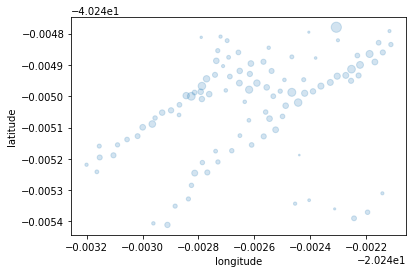

In [143]:
df = pd.DataFrame(kmeans.cluster_centers_, columns=['longitude','latitude'])
df['counts'] = counts
df.plot(kind="scatter", x="longitude", y="latitude", s="counts", alpha=0.2)